# CLEANING NULL VALUES

In [1]:
#load packages and set file paths.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

train_loc = r".\Homeloan_Traindata.csv"
test_loc = r".\Homeloan_Testdata.csv"

In [2]:
train = pd.read_csv(train_loc)
test = pd.read_csv(test_loc)
data = pd.concat([train,test])


print (train.shape, test.shape, data.shape)

data.tail()


(614, 13) (367, 12) (981, 13)


C:\Users\srisravana.p\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
362,4009,1777.0,1.0,3+,Not Graduate,Male,113.0,360.0,LP002971,NaN,Yes,Urban,Yes
363,4158,709.0,1.0,0,Graduate,Male,115.0,360.0,LP002975,NaN,Yes,Urban,No
364,3250,1993.0,NaN,0,Graduate,Male,126.0,360.0,LP002980,NaN,No,Semiurban,No
365,5000,2393.0,1.0,0,Graduate,Male,158.0,360.0,LP002986,NaN,Yes,Rural,No
366,9200,0.0,1.0,0,Graduate,Male,98.0,180.0,LP002989,NaN,No,Rural,Yes


In [3]:
#we're working with a dataset with under 1000 samples.
#let's take a look at the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [4]:
data.head()


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


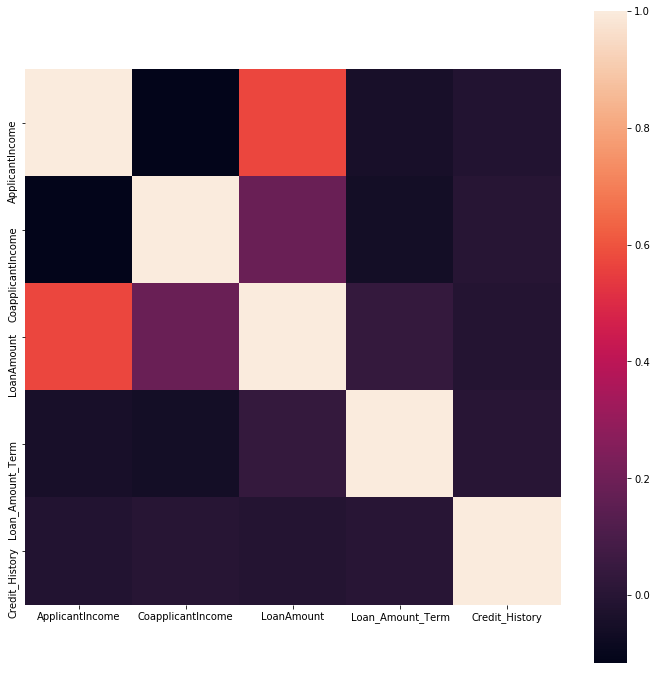

In [6]:
#check the correlation of the numerical feautres

corr = train.select_dtypes(include = ['float64', 'int64']).corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

#unsuprisingly applicant income and coapplicant income are positively correlated
#with loan amount.
plt.show()

In [7]:
#check amount of unique values in data.
data.apply(lambda x: len(x.unique()))

ApplicantIncome      752
CoapplicantIncome    437
Credit_History         3
Dependents             5
Education              2
Gender                 3
LoanAmount           233
Loan_Amount_Term      13
Loan_ID              981
Loan_Status            3
Married                3
Property_Area          3
Self_Employed          3
dtype: int64

In [8]:
#check for NaNs.
data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

# Working on Credit_History column to remove Nulls

In [9]:
print(train.Credit_History.value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [10]:
#print(train.Credit_History.isnull())
print (sum(train.Credit_History.isnull()), sum(test.Credit_History.isnull()))

50 29


In [11]:
print(train.Credit_History.value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [12]:
#We have 79 nulls in the Credit History column. They are spread between both
#the train and the test set. Let's change the column to a column of string
#type with values 'Yes', 'No', 'Unknown'.

replace_dict = {1.0:'Yes', 0.0:'No'}

train.Credit_History = train.Credit_History.replace(replace_dict)
test.Credit_History = test.Credit_History.replace(replace_dict)
train.Credit_History = train.Credit_History.fillna('Unknown')
test.Credit_History = test.Credit_History.fillna('Unknown')

In [13]:
print (sum(train.Dependents.isnull()), sum(test.Dependents.isnull()))

15 10


# Working on Dependants columns to remove Nulls

In [14]:
#There are 25 nulls in the Dependents column. They are spread between both
#the train and the test set. Let's repeat the data tidying process we used on
#the Credit History column.

replace_dict = {'0':'0', '1':'1', '2':'2', '3+':'3'}

train.Dependents = train.Dependents.replace(replace_dict)
test.Dependents = test.Dependents.replace(replace_dict)
train.Dependents = train.Dependents.fillna('Unknown')
test.Dependents = test.Dependents.fillna('Unknown')

# # Working on Gender columns to remove Nulls

In [15]:
print (sum(train.Gender.isnull()), sum(test.Gender.isnull()))

13 11


In [16]:
#There are 24 nulls in the Gender column. They are spread between both
#the train and the test set. Let's replace them with a string value again.

train.Gender = train.Gender.fillna('Unknown')
test.Gender = test.Gender.fillna('Unknown')

train.Gender.value_counts()

Male       489
Female     112
Unknown     13
Name: Gender, dtype: int64

# # Working on Self_Employed columns to remove Nulls

In [17]:
print (sum(train.Self_Employed.isnull()), sum(test.Self_Employed.isnull()))

32 23


In [18]:
#There are 24 nulls in the Self_Employed column. They are spread between both
#the train and the test set. Let's repeat the data tidying process we used on
#the Self_Employed column.

train.Self_Employed = train.Self_Employed.fillna('Unknown')
test.Self_Employed = test.Self_Employed.fillna('Unknown')

# # Working on Married columns to remove Nulls

In [19]:
print (sum(train.Married.isnull()), sum(test.Married.isnull()))

3 0


In [20]:
#There are 3 nulls in the Married column. Only the train set contains null values.
#This is not a problem. However, one must remember to take extra caution when creating dummy
#variables prior to feeding the data into models.

train.Married = train.Married.fillna('Unknown')

# # Working on Loan_amount columns to remove Nulls

In [21]:
print (sum(train.Loan_Amount_Term.isnull()), sum(test.Loan_Amount_Term.isnull()))

14 6


In [22]:
#There are 20 nulls in the Loan_Amount_Term column. Replace them with mean values
#for each differnt group (based on the categorical columns).

train.Loan_Amount_Term = train.groupby(['Gender', 'Dependents','Education','ApplicantIncome',
                                        'Married','Property_Area', 'Self_Employed']).Loan_Amount_Term.transform(
                                            lambda x: x.fillna(x.mean()))

test.Loan_Amount_Term = test.groupby(['Gender', 'Dependents','Education','ApplicantIncome',
                                        'Married','Property_Area', 'Self_Employed']).Loan_Amount_Term.transform(
                                            lambda x: x.fillna(x.mean()))

In [23]:
print (sum(train.LoanAmount.isnull()), sum(test.LoanAmount.isnull()))

22 5


In [24]:
#There are also null values in the loan amount column. Repeat the process used above.

train.LoanAmount = train.groupby(['Gender', 'Dependents','Education','ApplicantIncome',
                                  'Married','Property_Area', 'Self_Employed']).LoanAmount.transform(
                                            lambda x: x.fillna(x.mean()))

test.LoanAmount = test.groupby(['Gender', 'Dependents','Education','ApplicantIncome',
                                'Married','Property_Area', 'Self_Employed']).LoanAmount.transform(
                                            lambda x: x.fillna(x.mean()))

In [25]:
inds = pd.isnull(train).any(1).nonzero()[0]
inds2 = pd.isnull(test).any(1).nonzero()[0]
print (inds, inds2)

[  0  19  35  36  44  45  63  73  81  95 102 103 112 113 127 165 197 202
 223 232 284 305 322 335 338 367 387 421 423 435 437 479 524 550 551 605] [ 45  48  78 101 117 129 184 188 214 247 289]


In [26]:
#We can see that are still some NaNs left. Let's fill them in with the average
#for the column.

train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean())
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mean())
train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean())

In [27]:
data = pd.concat([train, test])

data.apply(lambda x: sum(x.isnull()))

C:\Users\srisravana.p\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

In [28]:

data.Loan_Status.value_counts()

# 614 -  NOT NULL
# 367  - NULL

Y    422
N    192
Name: Loan_Status, dtype: int64

In [32]:
#Excellent. Now the only null values in our data set are the target values we
#aim to predict. Let's save the train and test sets as separate CSV files 


train.to_csv('HomeLoan_trainafternull.csv', index=False)
test.to_csv('HomeLoan_testafternull.csv', index=False)

# Exploratory Data Analysis

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



train = pd.read_csv(r".\HomeLoan_trainafternull.csv")
test = pd.read_csv(r".\HomeLoan_testafternull.csv")
data = pd.concat([train,test])


print (train.shape, test.shape, data.shape)

data.head()

(614, 13) (367, 12) (981, 13)


C:\Users\srisravana.p\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if sys.path[0] == '':


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,Yes,0,Graduate,Male,146.412162,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,Yes,1,Graduate,Male,128.000000,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,Yes,0,Graduate,Male,66.000000,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,Yes,0,Not Graduate,Male,120.000000,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,Yes,0,Graduate,Male,141.000000,360.0,LP001008,Y,No,Urban,No


C:\Users\srisravana.p\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\srisravana.p\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


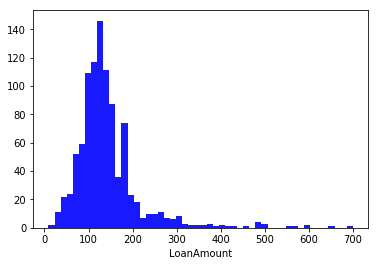

In [34]:
sns.distplot(data['LoanAmount'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

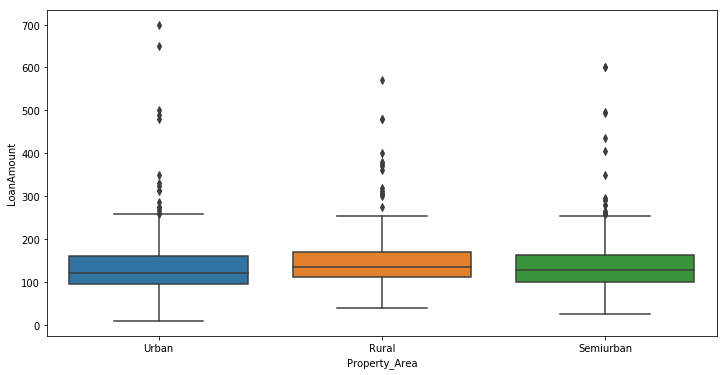

In [35]:
#The graph looks roughly like a Gaussian with a fat right tail, and large
#outlier values. This makes sense as house prices tend to lie around the average
#with some house being a lot more expensive than others. 

#Let's check to see how loan amounts and loan approvals vary by area.

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Property_Area', y = 'LoanAmount',  data = train)

In [36]:
#All three property areas have similar means and interquartile ranges.
#However, we can see that urban properties have a much wider range.

#Let's now look at the spread of data between different categories and how home loan approval 
#rates vary between the different categorical groupings.

replace_dict = {'Y':1, 'N':0}
train.Loan_Status = train.Loan_Status.replace(replace_dict)
#We need to convert our target variable to numerical values to make the plots below work.

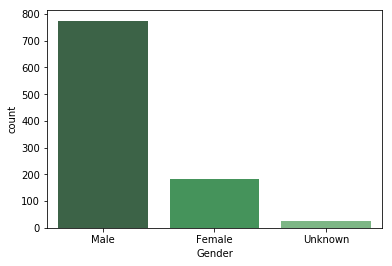

In [37]:
sns.countplot(x="Gender", data=data, palette="Greens_d")

#Males make up the vast majority of applicants for home loans.

In [38]:
gb = data.groupby(by=["Gender", "Loan_Status"])
gbs = gb.size()
print(gbs)
female = (gbs[1] / (gbs[0] + gbs[1]))*100
male = (gbs[3] / (gbs[2] + gbs[3]))*100

print (female, male)

Gender   Loan_Status
Female   N               37
         Y               75
Male     N              150
         Y              339
Unknown  N                5
         Y                8
dtype: int64
66.96428571428571 69.32515337423312


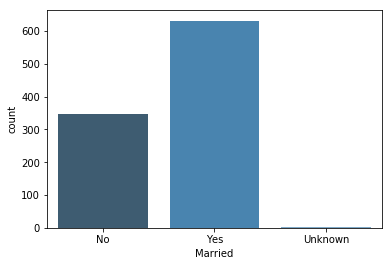

In [39]:
#Males we're approved loans slightly at a slightly higher rate than females.

sns.countplot(x="Married", data=data, palette="Blues_d")

#Most applicants are married.

In [40]:
gb = data.groupby(by=["Married", "Loan_Status"])
gbs = gb.size()

no = (gbs[1] / (gbs[0] + gbs[1]))*100
yes = (gbs[4] / (gbs[3] + gbs[4]))*100

print (no, yes)

62.91079812206573 71.60804020100502


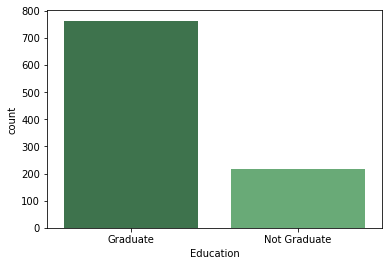

In [41]:
#Married people are approved loans at a higher rate than females. We can
#hypothesize that this is because home ownership is generally related to
#something one does as a couple, rather than as an individual.

sns.countplot(x="Education", data=data, palette="Greens_d")

In [42]:
#Graduates make up the vast majority of applicants for home loans.

gb = data.groupby(by=["Education", "Loan_Status"])
gbs = gb.size()
print(gbs)
graduate = (gbs[1] / (gbs[0] + gbs[1]))*100
not_grad = (gbs[3] / (gbs[2] + gbs[3]))*100

print (graduate, not_grad)

Education     Loan_Status
Graduate      N              140
              Y              340
Not Graduate  N               52
              Y               82
dtype: int64
70.83333333333334 61.19402985074627


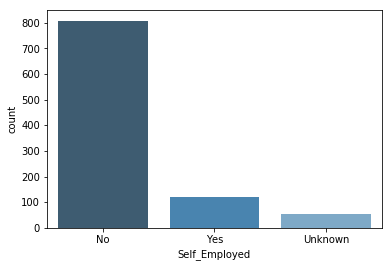

In [43]:
#Graduates we're approved loans at a higher rate than non graduates, again this
#makes intuitive sense.

sns.countplot(x="Self_Employed", data=data, palette="Blues_d")

In [44]:
#The vast majority of applicants are not self-employed.

gb = data.groupby(by=["Self_Employed", "Loan_Status"])
gbs = gb.size()

not_self = (gbs[1] / (gbs[0] + gbs[1]))*100
self = (gbs[5] / (gbs[4] + gbs[5]))*100

print (not_self, self)

68.60000000000001 68.29268292682927


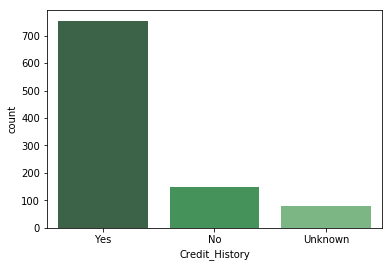

In [45]:
#Rates are almost identical between self employed and non self employed
#applicants. 

sns.countplot(x="Credit_History", data=data, palette="Greens_d")

In [46]:
#As one would hope the majority of applicants's credit history met the guidelines.

gb = data.groupby(by=["Credit_History", "Loan_Status"])
gbs = gb.size()

no = (gbs[1] / (gbs[0] + gbs[1]))*100
yes = (gbs[5] / (gbs[4] + gbs[5]))*100

print (yes, no)

79.57894736842105 7.865168539325842


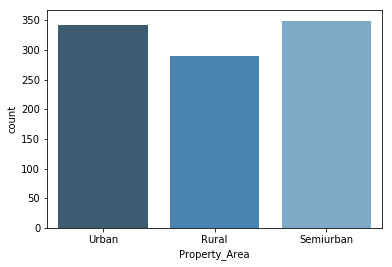

In [47]:
#No big suprise here. Only 7.8% of applicants whose credit history did not
#meet guidelines were approved loans, compared to 79.5% for those who history
#was up to scratch. An interesting question is why the 7.8% were approved
#housing loans. Perhaps this dataset hints at reasons for the trouble in the
#US housing market that sparked off the Great Recession.

sns.countplot(x="Property_Area", data=data, palette="Blues_d")

In [48]:
#All three property areas are well represented in the data set, with semiurban having slightly
#more appearances than urban.

gb = data.groupby(by=["Property_Area", "Loan_Status"])
gbs = gb.size()

rural = (gbs[1] / (gbs[0] + gbs[1]))*100
semiurban = (gbs[3] / (gbs[2] + gbs[3]))*100
urban = (gbs[5] / (gbs[4] + gbs[5]))*100

print (rural, semiurban, urban)

61.452513966480446 76.82403433476395 65.84158415841584


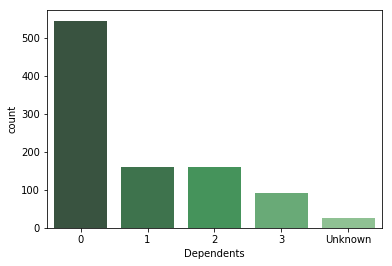

In [49]:
#Semiurban has the highest approval rate, some 15% higher than the lowest urban.
#Presumably semiurban refers to the suburbs, as far as I am aware these tend to
#be the most affluent areas in America. Those looking to live in such areas
#presumably command the incomes necessary to buy houses in those areas, and as
#a result banks end up approving more loans in these areas than in urban and
#rural areas.

sns.countplot(x="Dependents", data=data, palette="Greens_d")

In [50]:
#Most applicants for home loans do not have any dependents. 

gb = data.groupby(["Dependents", "Loan_Status"])
gbs = gb.size()
print(gbs)
none = (gbs[1] / (gbs[0] + gbs[1]))*100
one = (gbs[3] / (gbs[2] + gbs[3]))*100
two = (gbs[5] / (gbs[4] + gbs[5]))*100
three = (gbs[7] / (gbs[6] + gbs[7]))*100

print (none, one, two, three)

Dependents  Loan_Status
0           N              107
            Y              238
1           N               36
            Y               66
2           N               25
            Y               76
3           N               18
            Y               33
Unknown     N                6
            Y                9
dtype: int64
68.98550724637681 64.70588235294117 75.24752475247524 64.70588235294117


C:\Users\srisravana.p\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


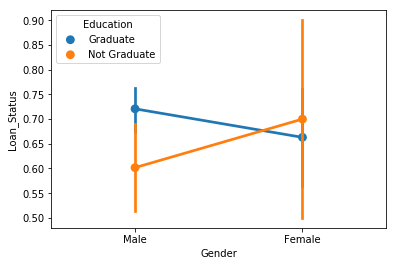

In [51]:
#Those with 2 dependents come out on top with those without dependents in second.
#1 and 3 or more dependents have near identical approval rates. 
#Dropping Unknown Gender columns


train_no_unknown = train.drop(train[train.Gender == 'Unknown'].index)

sns.pointplot(x="Gender", y="Loan_Status",
              hue="Education", data=train_no_unknown)

In [52]:
#This concludes the EDA. Next I will attempt to predict the loan_status variable on the test set.

# MODEL

In [70]:
#To make predictions on the test set I will use a gradient boosting method.
#For more info see: https://en.wikipedia.org/wiki/Gradient_boosting

import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

train_loc = r".\HomeLoan_trainafternull.csv"
test_loc = r".\HomeLoan_testafternull.csv"
#submit_loc = r"C:\Users\me\Documents\datasets\claim_submit.csv"

train = pd.read_csv(train_loc)
test = pd.read_csv(test_loc)



print("****TRAIN*******",train.columns)
print("******TEST*******",test.columns)

****TRAIN******* Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
******TEST******* Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [71]:
#Create dummy variables then shuffle the train set.

cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area']

train = pd.get_dummies(train, columns = cols)
test = pd.get_dummies(test, columns = cols)

train = train.sample(frac=1).reset_index(drop=True)

print("****TRAIN*******",train.columns)
print("******TEST*******",test.columns)


****TRAIN******* Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Gender_Female', 'Gender_Male',
       'Gender_Unknown', 'Married_No', 'Married_Unknown', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3',
       'Dependents_Unknown', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Unknown', 'Self_Employed_Yes',
       'Credit_History_No', 'Credit_History_Unknown', 'Credit_History_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')
******TEST******* Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Gender_Unknown',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3', 'Dependents_Unknown',
       'Education_Graduate', 'Education_Not Graduate', 'Self_

In [72]:
#Set the target variable.

y = train.Loan_Status

In [73]:
#Drop the unnecessary columns and prepare or data for our submission file.

train =  train.drop(['Loan_ID', 'Loan_Status'], axis=1)
X = train.astype(np.float32)
submit = test['Loan_ID']

In [74]:
#Do the same for the test set. Unlike the train set there was no unknown data in the married 
#column on the test set. As a result we have to insert a Married Unknown column as Pandas did
#not create this column when we ran pd.get_dummies() on the test set.

test = test.drop('Loan_ID', axis=1)
test.insert(8, 'Married_Unknown', 0)

In [87]:
#Use Scikit-Learn's train_test_split function to create train and validation sets.

X_train, X_pred, y_train, y_pred = train_test_split(X, y, train_size=0.8)

In [94]:
#Create a function to run a gradient boosted classifier over our data. The reason we have to
#do this is due to the way Python uses parallelization on Windows.
#https://www.kaggle.com/c/malware-classification/forums/t/12802/
#anyone-getting-parallelizing-error-for-scikit-learn-based-models-in-python/66187#post66187

#Note numerous different values were used in the param_grid to hone in on the best paramater
#combinations. The param grid below is the final one I used.

def model(X_train, X_pred, y_train, y_pred):
    if __name__ == '__main__':
    
        param_grid = {'learning_rate': [0.03, 0.035],
                      'max_depth': [3, 4, 5],
                      'min_samples_leaf': [17, 18],
                      'max_features': [1.0, 0.95, 0.9],
                      'n_estimators': [100, 300, 500]
                      }

        estimator = GridSearchCV(estimator=GradientBoostingClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1)

        estimator.fit(X_train, y_train)

        best_params = estimator.best_params_
        print(best_params)                      
        validation_accuracy = estimator.score(X_pred, y_pred)
        print('Validation accuracy: ', validation_accuracy)
        
        return best_params

        

In [89]:
#params that appeared most often after running the model ten times.
    
params = {'min_samples_leaf': 17, 'max_features': 0.95, 'max_depth': 3,
          'learning_rate': 0.03, 'n_estimators': 500}

In [90]:
#Fit model using our data and the best parameters found by GridSearchCV.

model = GradientBoostingClassifier(**params)
model.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=3,
              max_features=0.95, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=17, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [91]:
#Make predictions on the test set.

preds = model.predict(test)

In [92]:
#Create submission file.

preds = pd.Series(preds)
submit = pd.concat([submit, preds], names=['Loan_ID', 'Loan_Status'], axis=1)
submit.columns = ['Loan_ID', 'Loan_Status']

In [93]:
#Create CSV file for submission.

submit.to_csv('loan1.csv', index=False)